In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

import torch
from torchvision import datasets, transforms

* `torch.nn` [documentation](https://pytorch.org/docs/stable/nn.html).
* `torchvision` [documentation](https://pytorch.org/vision/stable/index.html).

## Load MNIST data

In [ ]:
def plot_images(
    images: torch.Tensor,
    labels: torch.Tensor,
    num_images: int=9,
) -> None:
  """Visualize images."""
  batch_size = images.size(0)

  # Select images.
  which_imgs = np.random.choice(batch_size, num_images, replace=False)
  imgs = images[which_imgs, :]
  labs = labels[which_imgs]

  # Create plot.
  n = math.floor(math.sqrt(num_images))
  fig, axes = plt.subplots(n, n, figsize=(6, 6))
  for i, ax in enumerate(axes.flat):
    img = imgs[i].numpy().transpose((1, 2, 0)).squeeze()
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Label: {labs[i].item()}")
    ax.axis('off')

  # Display plot.
  plt.tight_layout()
  plt.show()

  return None

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Define data loaders.
train_loader = torch.utils.data.DataLoader(dataset=train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test, batch_size=1000, shuffle=False)

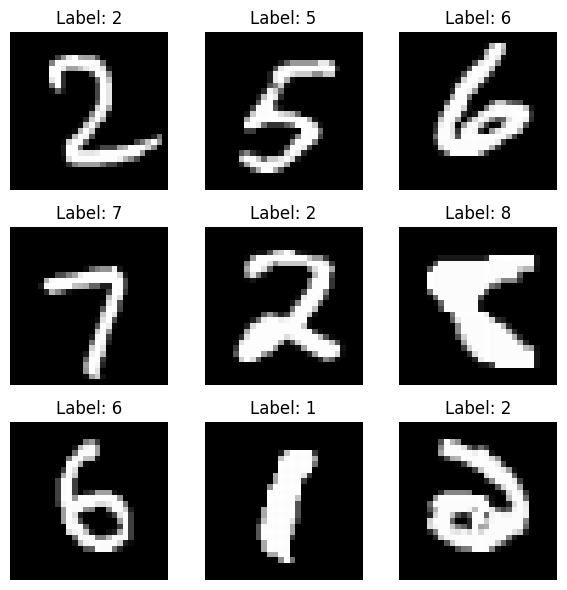

In [ ]:
# Inspect a batch.
images, labels = next(iter(train_loader))
plot_images(images, labels)

## Basic model

In [ ]:
class SoftmaxRegression(torch.nn.Module):
  """Softmax regression.

  Note the output for the forward pass is on logit scale.

  """

  def __init__(self, input_size: int=28*28, n_classes: int=10):
    super().__init__()
    self.linear = torch.nn.Linear(input_size, n_classes)

  def forward(self, x):
    out = self.linear(x)
    return out

In [ ]:
def fit_model(
    loader,
    lr: float=0.001,
    epochs: int=10,
):

  model = SoftmaxRegression()
  loss_fn = torch.nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)

  for epoch in range(epochs):
      for batch_idx, (images, labels) in enumerate(loader):

          # Forward pass.
          flat_images = images.view(-1, 28*28)
          logits = model(flat_images)
          loss = loss_fn(logits, labels)

          # Updated weights.
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

      print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

  return model

In [49]:
model = fit_model(train_loader)

Epoch [1/10], Loss: 0.2107
Epoch [2/10], Loss: 0.2681
Epoch [3/10], Loss: 0.2178
Epoch [4/10], Loss: 0.6597
Epoch [5/10], Loss: 0.2210
Epoch [6/10], Loss: 0.3637
Epoch [7/10], Loss: 0.4502
Epoch [8/10], Loss: 0.4102
Epoch [9/10], Loss: 0.3283
Epoch [10/10], Loss: 0.1526
